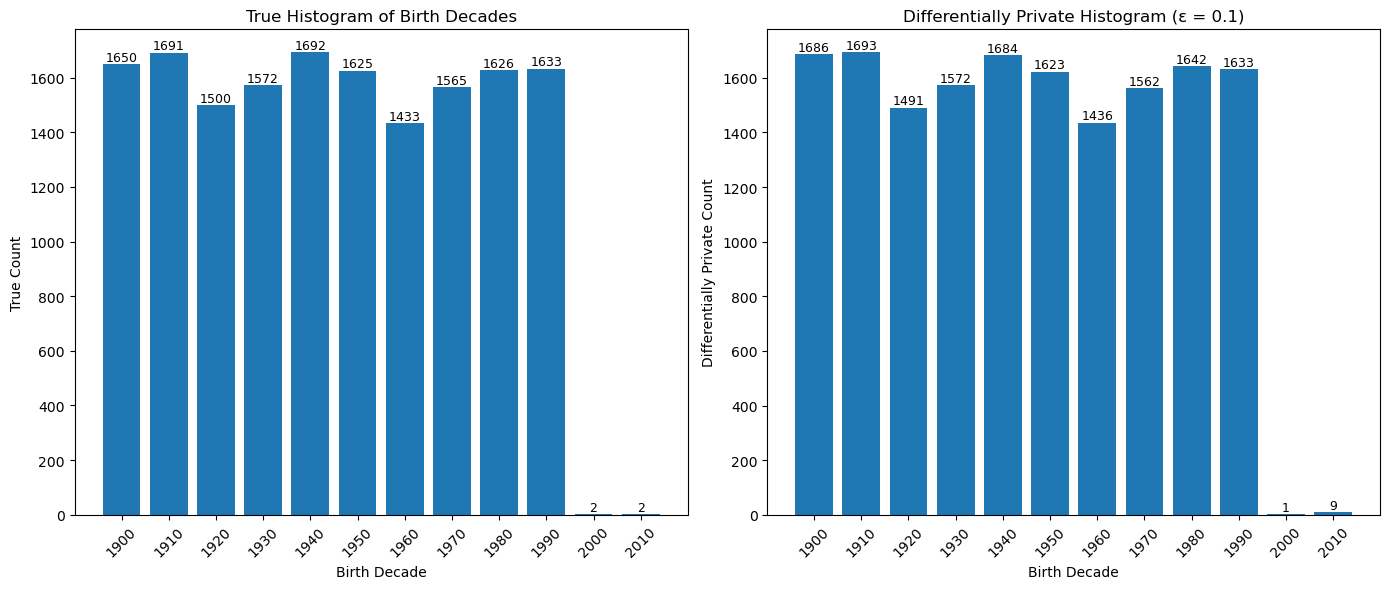


Similarity between True and DP Histograms:
- Mean Squared Error (MSE): 147.75
- Mean Absolute Error (MAE): 7.25
- Pearson Correlation Coefficient: 1.000


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from diffprivlib.mechanisms import Laplace
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr

# STEP 1: Load the dataset
file_path = '/Users/felipecastanogonzalez/Downloads/ChfSynthData-13_09_2024.csv'
df = pd.read_csv(file_path)

# STEP 2: Clean the data - remove duplicates and rows with missing/inconsistent values
df = df.drop_duplicates()
relevant_columns = ["FirstName", "LastName", "DobDay", "DobMonth", "DobYear"]
df = df.dropna(subset=relevant_columns)

# STEP 3: Keep only relevant attributes for privacy-preserving analysis
data = df[relevant_columns].copy()

# STEP 4: Standardize column formats
data['FirstName'] = data['FirstName'].astype(str).str.strip()
data['LastName'] = data['LastName'].astype(str).str.strip()
data['DobYear'] = pd.to_numeric(data['DobYear'], errors='coerce')
data = data.dropna(subset=['DobYear'])
data['DobYear'] = data['DobYear'].astype(int)

# STEP 5: Create "Decade" column for grouping
data['Decade'] = (data['DobYear'] // 10) * 10

# STEP 6: Count births per decade (true histogram)
true_counts = data['Decade'].value_counts().sort_index()

# STEP 7: Apply Differential Privacy (Laplace mechanism) to each count
epsilon = 0.1  # Privacy budget
laplace = Laplace(epsilon=epsilon, sensitivity=1)

dp_counts = true_counts.apply(lambda x: max(0, round(laplace.randomise(x))))

# STEP 8: Plot both histograms side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# True histogram
axes[0].bar(true_counts.index.astype(str), true_counts.values)
axes[0].set_xlabel("Birth Decade")
axes[0].set_ylabel("True Count")
axes[0].set_title("True Histogram of Birth Decades")
axes[0].tick_params(axis='x', rotation=45)

# Add labels to bars
for i, (x, y) in enumerate(zip(true_counts.index.astype(str), true_counts.values)):
    axes[0].text(x, y + 1, str(y), ha='center', va='bottom', fontsize=9)

# DP histogram
axes[1].bar(dp_counts.index.astype(str), dp_counts.values)
axes[1].set_xlabel("Birth Decade")
axes[1].set_ylabel("Differentially Private Count")
axes[1].set_title(f"Differentially Private Histogram (ε = {epsilon})")
axes[1].tick_params(axis='x', rotation=45)

# Add labels to bars
for i, (x, y) in enumerate(zip(dp_counts.index.astype(str), dp_counts.values)):
    axes[1].text(x, y + 1, str(y), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# STEP 9: Compute similarity metrics
true_vals = true_counts.sort_index().values
dp_vals = dp_counts.sort_index().reindex(true_counts.index, fill_value=0).values

mse = mean_squared_error(true_vals, dp_vals)
mae = mean_absolute_error(true_vals, dp_vals)
corr, _ = pearsonr(true_vals, dp_vals)

# STEP 10: Show similarity results
print("\nSimilarity between True and DP Histograms:")
print(f"- Mean Squared Error (MSE): {mse:.2f}")
print(f"- Mean Absolute Error (MAE): {mae:.2f}")
print(f"- Pearson Correlation Coefficient: {corr:.3f}")

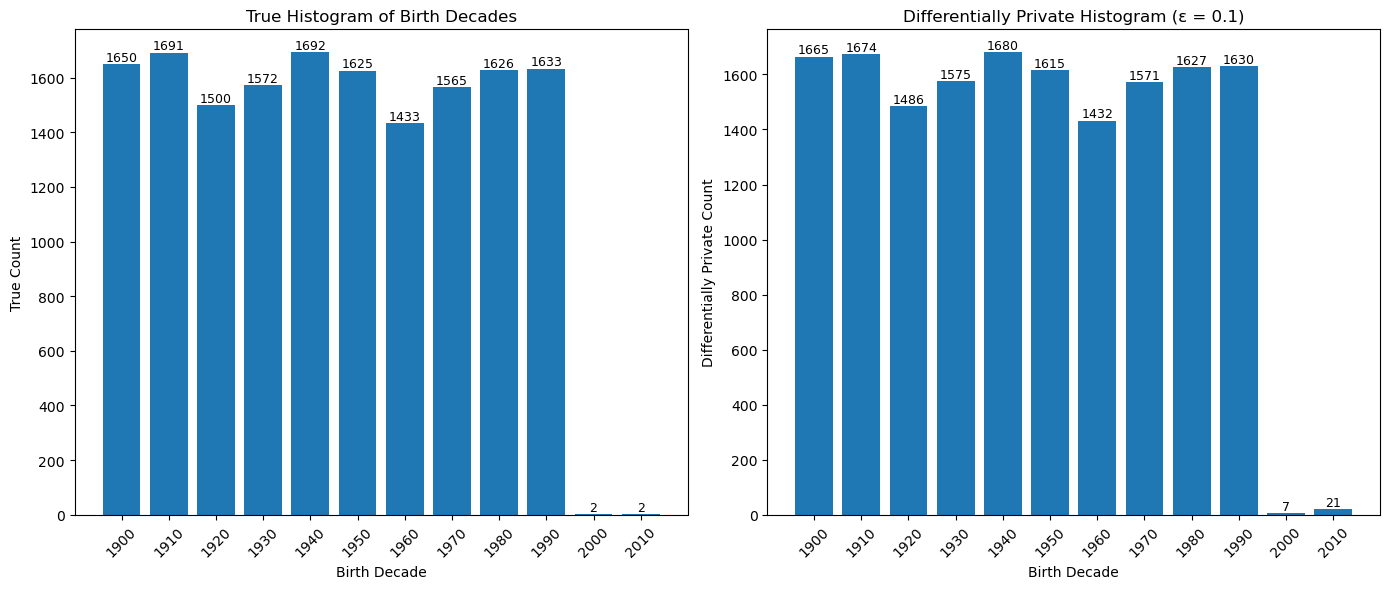


Similarity between True and DP Histograms:
- Mean Squared Error (MSE): 116.33
- Mean Absolute Error (MAE): 8.83
- Spearman Correlation Coefficient: 0.998


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from diffprivlib.mechanisms import Laplace
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import spearmanr  # Updated import

# STEP 1: Load the dataset
file_path = '/Users/felipecastanogonzalez/Downloads/ChfSynthData-13_09_2024.csv'
df = pd.read_csv(file_path)

# STEP 2: Clean the data - remove duplicates and rows with missing/inconsistent values
df = df.drop_duplicates()
relevant_columns = ["FirstName", "LastName", "DobDay", "DobMonth", "DobYear"]
df = df.dropna(subset=relevant_columns)

# STEP 3: Keep only relevant attributes for privacy-preserving analysis
data = df[relevant_columns].copy()

# STEP 4: Standardize column formats
data['FirstName'] = data['FirstName'].astype(str).str.strip()
data['LastName'] = data['LastName'].astype(str).str.strip()
data['DobYear'] = pd.to_numeric(data['DobYear'], errors='coerce')
data = data.dropna(subset=['DobYear'])
data['DobYear'] = data['DobYear'].astype(int)

# STEP 5: Create "Decade" column for grouping
data['Decade'] = (data['DobYear'] // 10) * 10

# STEP 6: Count births per decade (true histogram)
true_counts = data['Decade'].value_counts().sort_index()

# STEP 7: Apply Differential Privacy (Laplace mechanism) to each count
epsilon = 0.1  # Privacy budget
laplace = Laplace(epsilon=epsilon, sensitivity=1)

dp_counts = true_counts.apply(lambda x: max(0, round(laplace.randomise(x))))

# STEP 8: Plot both histograms side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# True histogram
axes[0].bar(true_counts.index.astype(str), true_counts.values)
axes[0].set_xlabel("Birth Decade")
axes[0].set_ylabel("True Count")
axes[0].set_title("True Histogram of Birth Decades")
axes[0].tick_params(axis='x', rotation=45)

# Add labels to bars
for i, (x, y) in enumerate(zip(true_counts.index.astype(str), true_counts.values)):
    axes[0].text(x, y + 1, str(y), ha='center', va='bottom', fontsize=9)

# DP histogram
axes[1].bar(dp_counts.index.astype(str), dp_counts.values)
axes[1].set_xlabel("Birth Decade")
axes[1].set_ylabel("Differentially Private Count")
axes[1].set_title(f"Differentially Private Histogram (ε = {epsilon})")
axes[1].tick_params(axis='x', rotation=45)

# Add labels to bars
for i, (x, y) in enumerate(zip(dp_counts.index.astype(str), dp_counts.values)):
    axes[1].text(x, y + 1, str(y), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# STEP 9: Compute similarity metrics
true_vals = true_counts.sort_index().values
dp_vals = dp_counts.sort_index().reindex(true_counts.index, fill_value=0).values

mse = mean_squared_error(true_vals, dp_vals)
mae = mean_absolute_error(true_vals, dp_vals)
corr, _ = spearmanr(true_vals, dp_vals)  # Spearman correlation

# STEP 10: Show similarity results
print("\nSimilarity between True and DP Histograms:")
print(f"- Mean Squared Error (MSE): {mse:.2f}")
print(f"- Mean Absolute Error (MAE): {mae:.2f}")
print(f"- Spearman Correlation Coefficient: {corr:.3f}")
